In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
# File paths for the three parquet files (excluding the all possible training data file)
file_paths = {
    "Test Data": '/data/disambiguation/mtg2/parquet_data/Disambiguator_final_test_data.parquet',
    "Train Data": '/data/disambiguation/mtg2/parquet_data/Disambiguator_final_train_data.parquet',
    "Val Data": '/data/disambiguation/mtg2/parquet_data/Disambiguator_final_val_data.parquet'
}

In [19]:
# Columns to plot
columns_to_plot = [
    'inst_match', 'inst_sum', 'concepts_shortest_match', 'concepts_shortest_sum',
    'concepts_shorter_match', 'concepts_shorter_sum', 'concepts_match', 'concepts_sum',
    'coauthors_shorter_match', 'coauthors_shorter_sum', 'coauthors_match', 'coauthors_sum',
    'citation_match', 'citation_sum', 'citation_work_match', 'name_1_len', 'name_1_spaces',
    'exact_match_len', 'exact_match_spaces', 'inst_per'
]

In [20]:
# Output directory for graphs
output_directory = '/data/disambiguation/mtg2/rachel_test_scripts/output_data/compare_all_parquet_stats'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

Loaded Test Data from /data/disambiguation/mtg2/parquet_data/Disambiguator_final_test_data.parquet
Loaded Train Data from /data/disambiguation/mtg2/parquet_data/Disambiguator_final_train_data.parquet
Loaded Val Data from /data/disambiguation/mtg2/parquet_data/Disambiguator_final_val_data.parquet
Saved normalized frequency graph for inst_match to /data/disambiguation/mtg2/rachel_test_scripts/output_data/compare_all_parquet_stats/inst_match_comparison_normalized.png


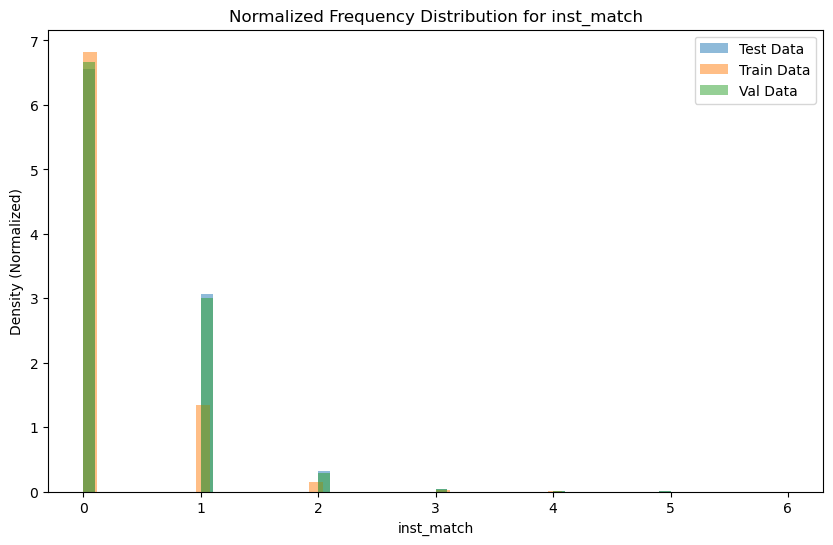

Saved normalized frequency graph for inst_sum to /data/disambiguation/mtg2/rachel_test_scripts/output_data/compare_all_parquet_stats/inst_sum_comparison_normalized.png


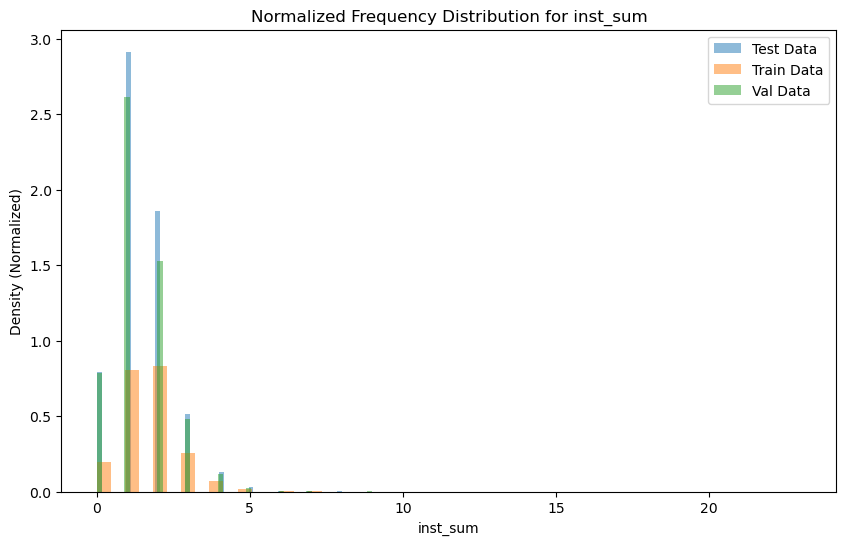

Saved normalized frequency graph for concepts_shortest_match to /data/disambiguation/mtg2/rachel_test_scripts/output_data/compare_all_parquet_stats/concepts_shortest_match_comparison_normalized.png


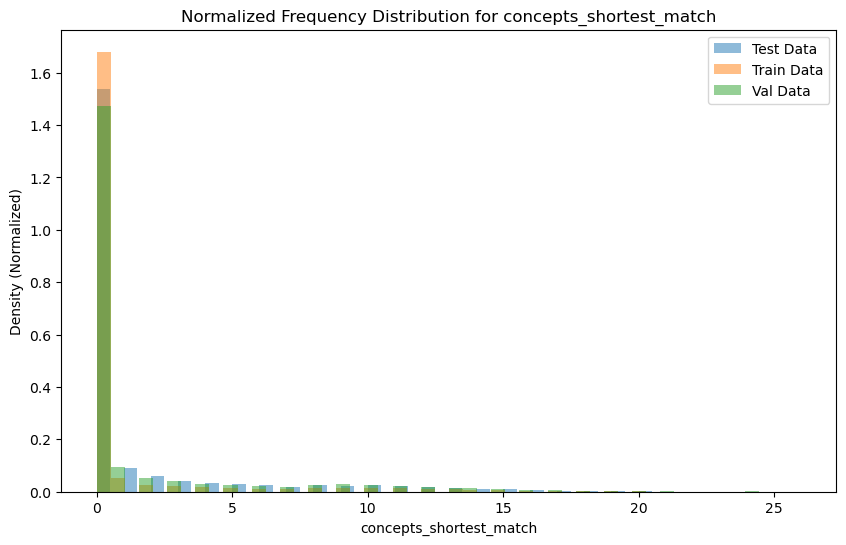

Saved normalized frequency graph for concepts_shortest_sum to /data/disambiguation/mtg2/rachel_test_scripts/output_data/compare_all_parquet_stats/concepts_shortest_sum_comparison_normalized.png


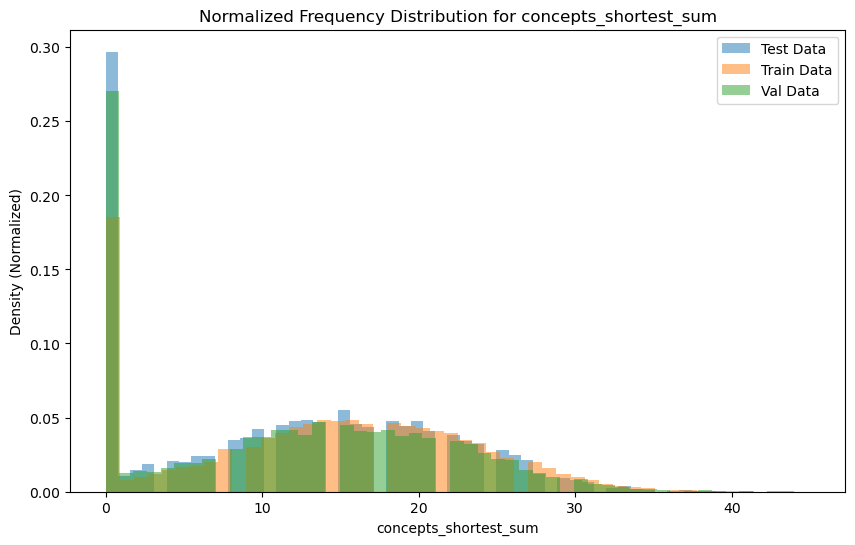

Saved normalized frequency graph for concepts_shorter_match to /data/disambiguation/mtg2/rachel_test_scripts/output_data/compare_all_parquet_stats/concepts_shorter_match_comparison_normalized.png


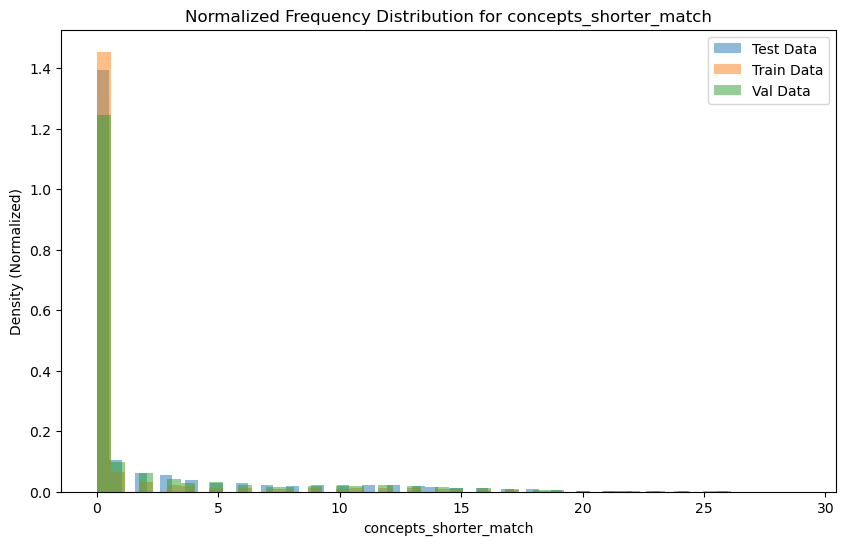

Saved normalized frequency graph for concepts_shorter_sum to /data/disambiguation/mtg2/rachel_test_scripts/output_data/compare_all_parquet_stats/concepts_shorter_sum_comparison_normalized.png


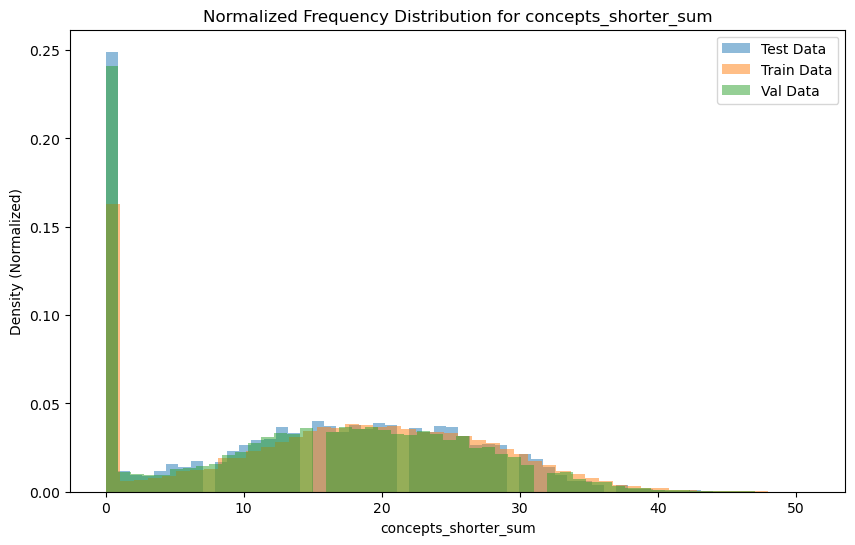

Saved normalized frequency graph for concepts_match to /data/disambiguation/mtg2/rachel_test_scripts/output_data/compare_all_parquet_stats/concepts_match_comparison_normalized.png


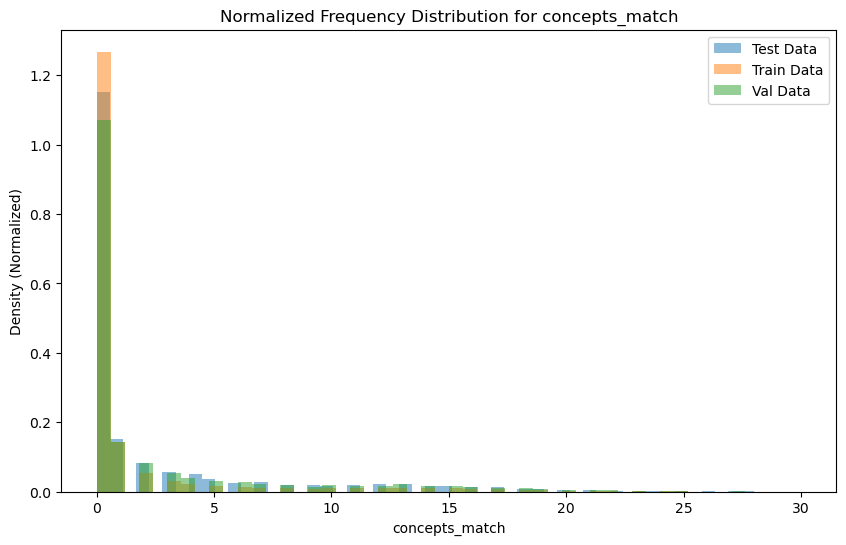

Saved normalized frequency graph for concepts_sum to /data/disambiguation/mtg2/rachel_test_scripts/output_data/compare_all_parquet_stats/concepts_sum_comparison_normalized.png


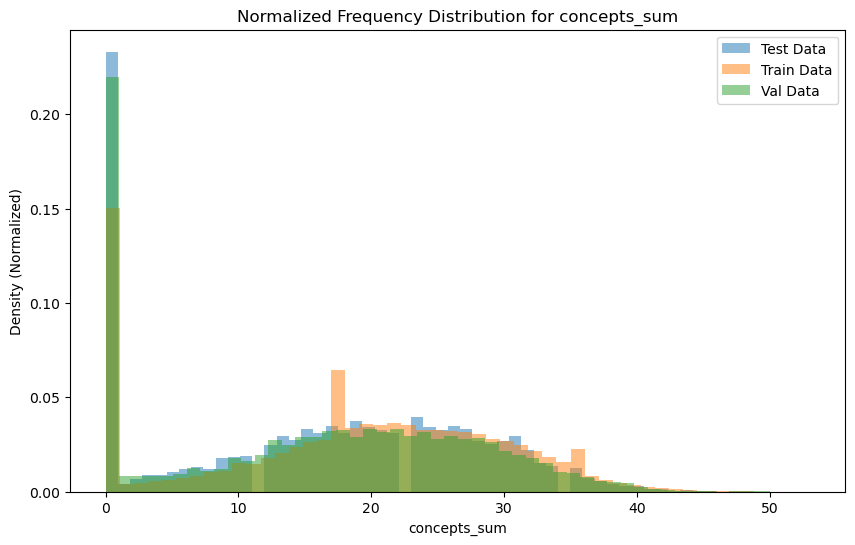

Saved normalized frequency graph for coauthors_shorter_match to /data/disambiguation/mtg2/rachel_test_scripts/output_data/compare_all_parquet_stats/coauthors_shorter_match_comparison_normalized.png


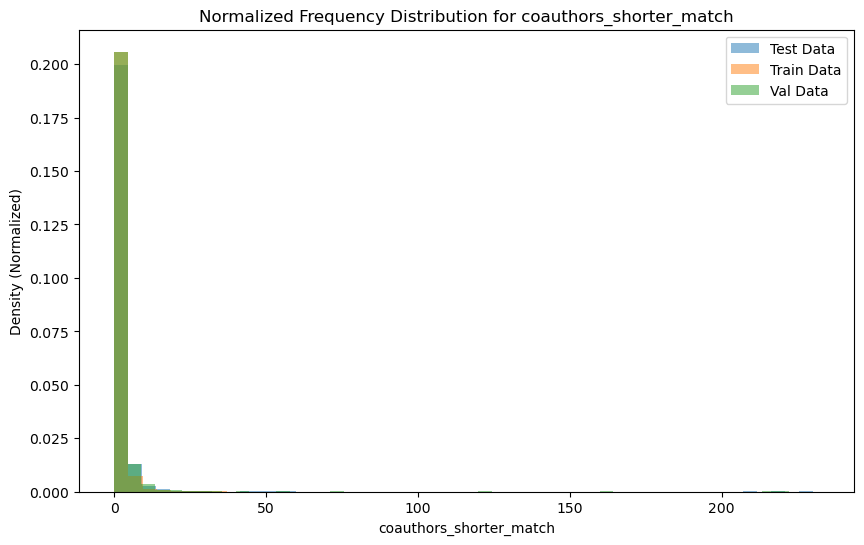

Saved normalized frequency graph for coauthors_shorter_sum to /data/disambiguation/mtg2/rachel_test_scripts/output_data/compare_all_parquet_stats/coauthors_shorter_sum_comparison_normalized.png


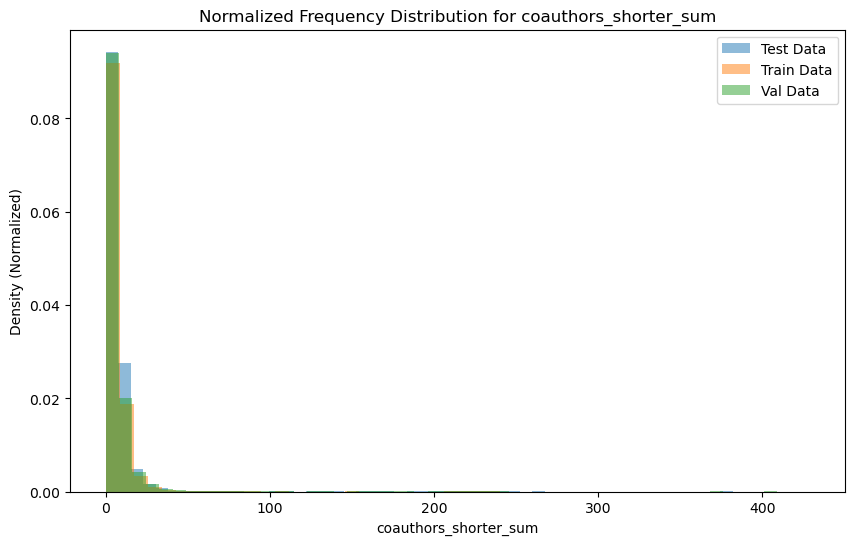

Saved normalized frequency graph for coauthors_match to /data/disambiguation/mtg2/rachel_test_scripts/output_data/compare_all_parquet_stats/coauthors_match_comparison_normalized.png


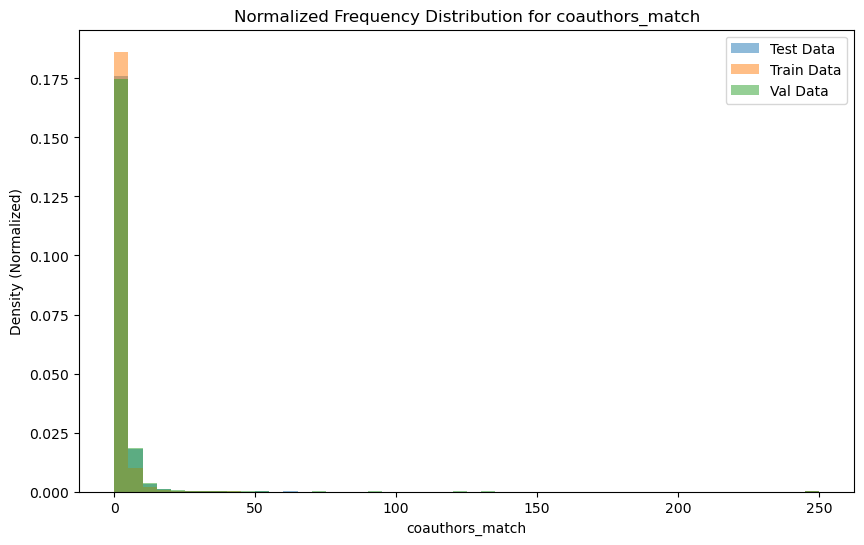

Saved normalized frequency graph for coauthors_sum to /data/disambiguation/mtg2/rachel_test_scripts/output_data/compare_all_parquet_stats/coauthors_sum_comparison_normalized.png


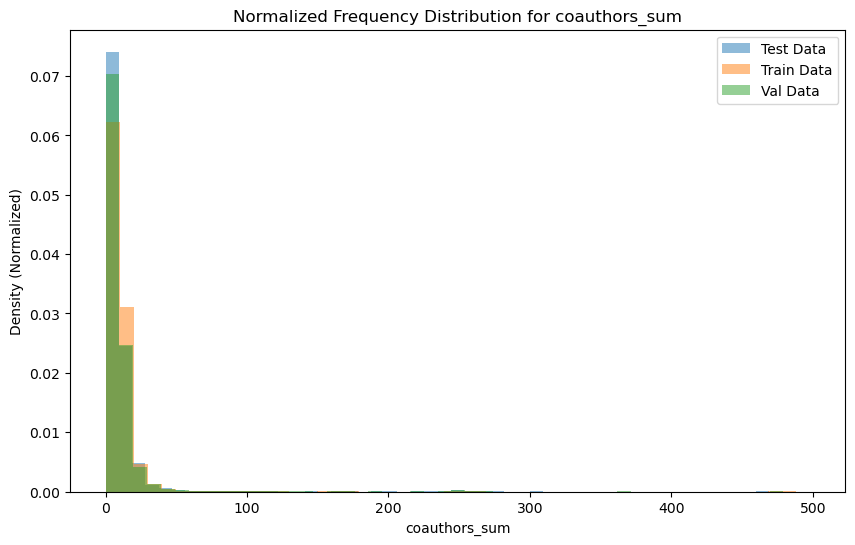

Saved normalized frequency graph for citation_match to /data/disambiguation/mtg2/rachel_test_scripts/output_data/compare_all_parquet_stats/citation_match_comparison_normalized.png


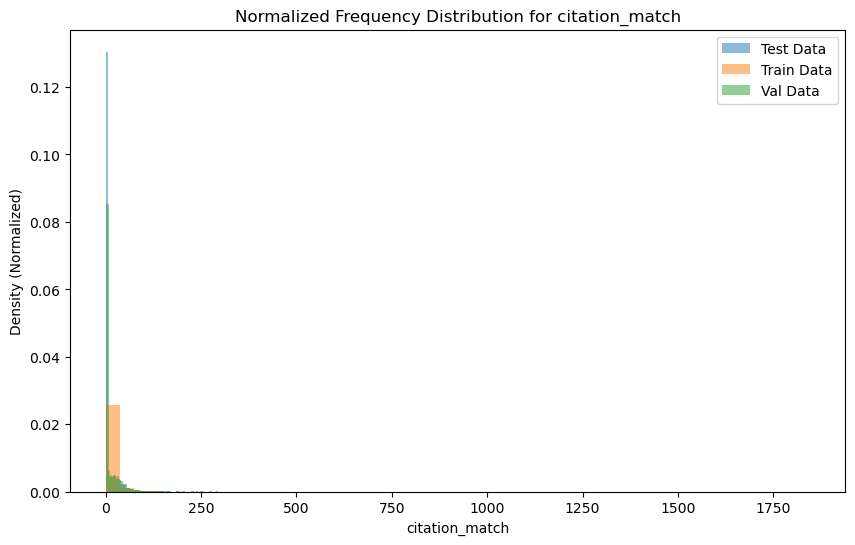

Saved normalized frequency graph for citation_sum to /data/disambiguation/mtg2/rachel_test_scripts/output_data/compare_all_parquet_stats/citation_sum_comparison_normalized.png


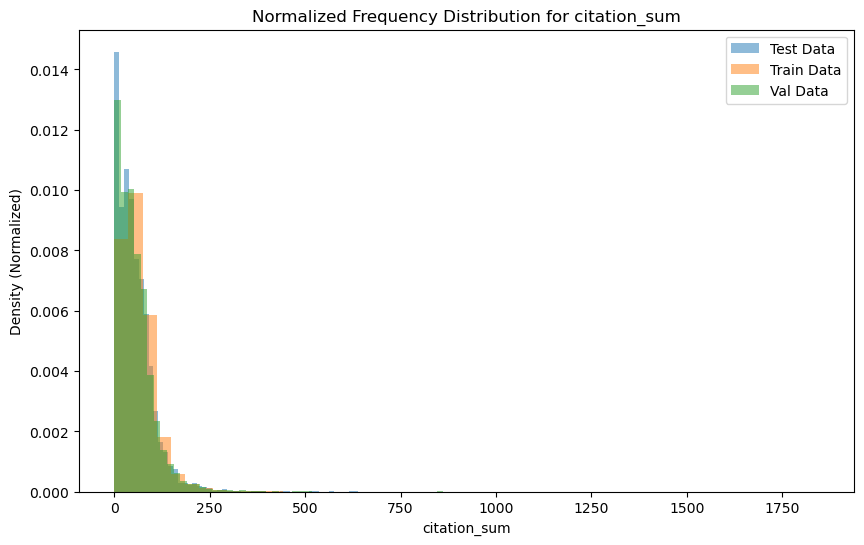

Saved normalized frequency graph for citation_work_match to /data/disambiguation/mtg2/rachel_test_scripts/output_data/compare_all_parquet_stats/citation_work_match_comparison_normalized.png


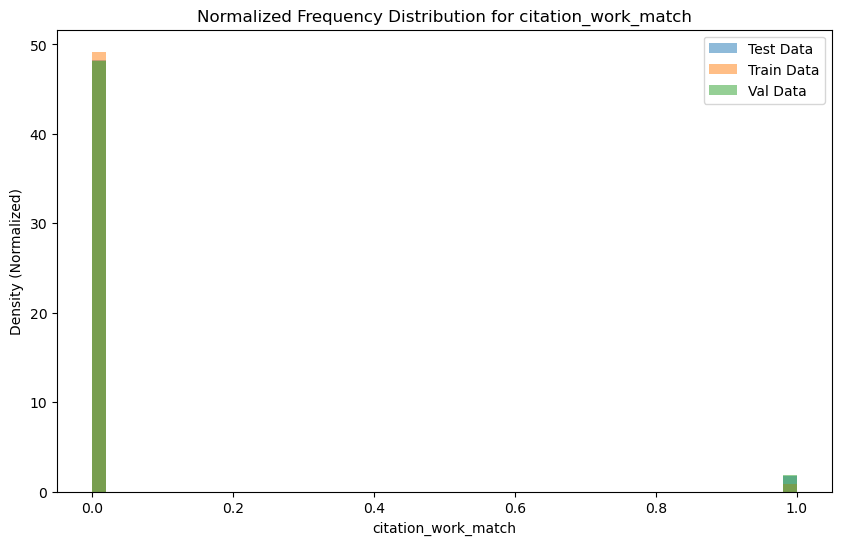

Saved normalized frequency graph for name_1_len to /data/disambiguation/mtg2/rachel_test_scripts/output_data/compare_all_parquet_stats/name_1_len_comparison_normalized.png


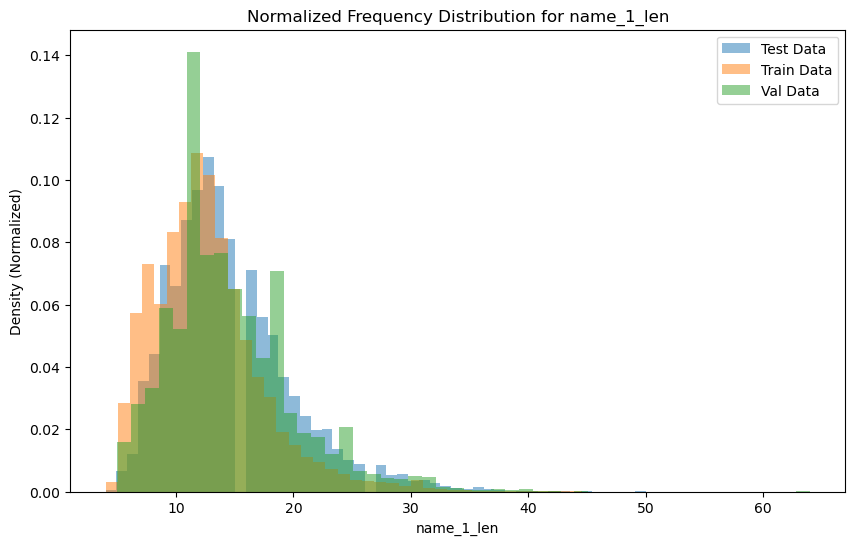

Saved normalized frequency graph for name_1_spaces to /data/disambiguation/mtg2/rachel_test_scripts/output_data/compare_all_parquet_stats/name_1_spaces_comparison_normalized.png


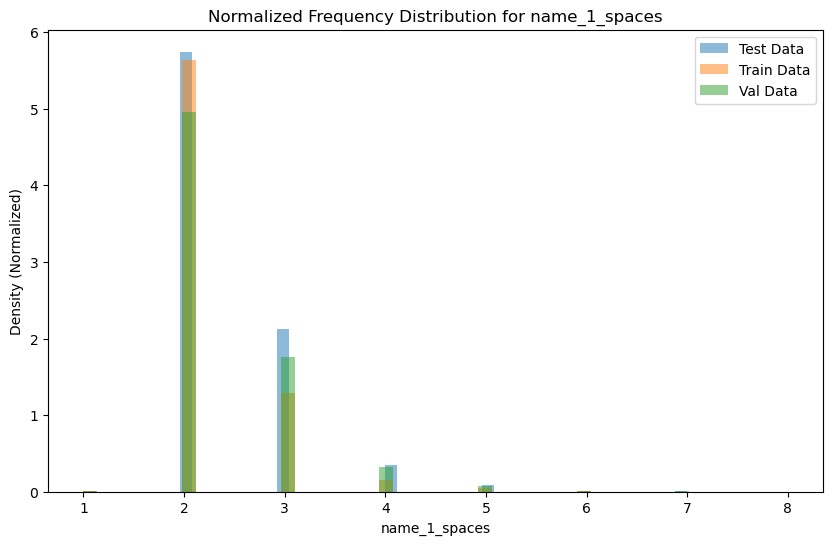

Saved normalized frequency graph for exact_match_len to /data/disambiguation/mtg2/rachel_test_scripts/output_data/compare_all_parquet_stats/exact_match_len_comparison_normalized.png


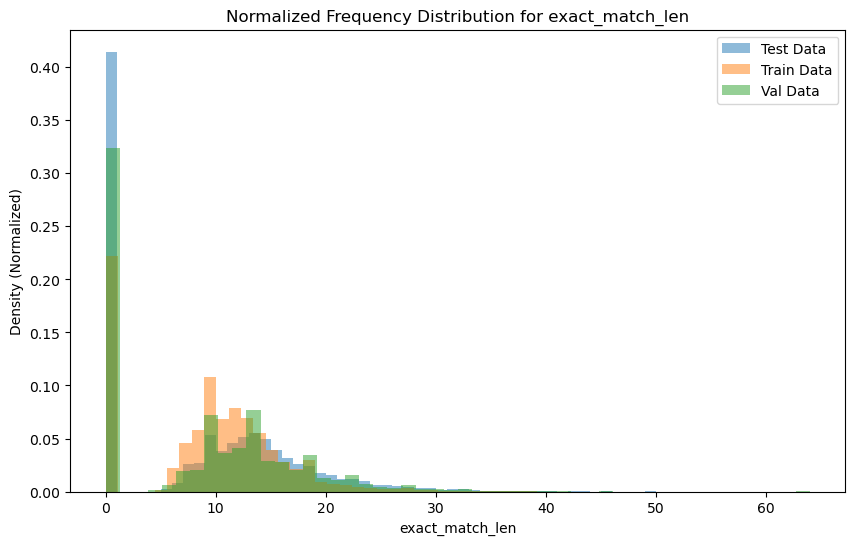

Saved normalized frequency graph for exact_match_spaces to /data/disambiguation/mtg2/rachel_test_scripts/output_data/compare_all_parquet_stats/exact_match_spaces_comparison_normalized.png


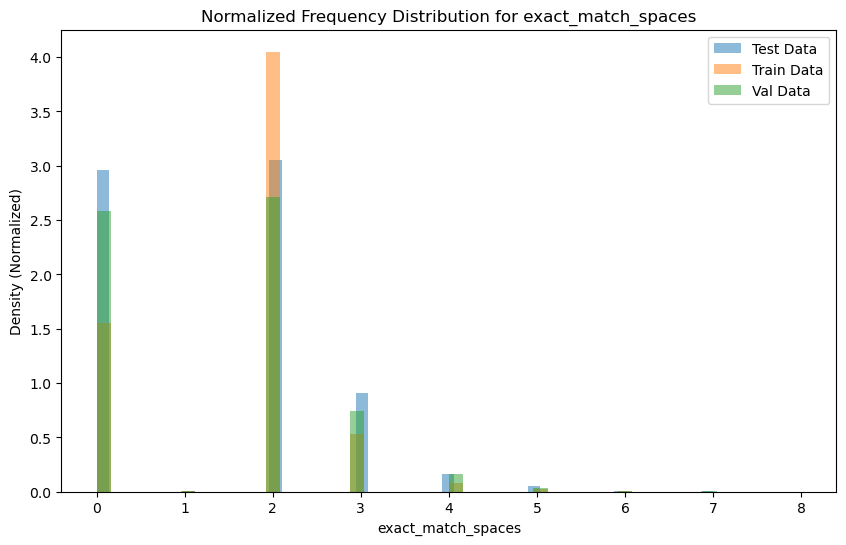

Saved normalized frequency graph for inst_per to /data/disambiguation/mtg2/rachel_test_scripts/output_data/compare_all_parquet_stats/inst_per_comparison_normalized.png


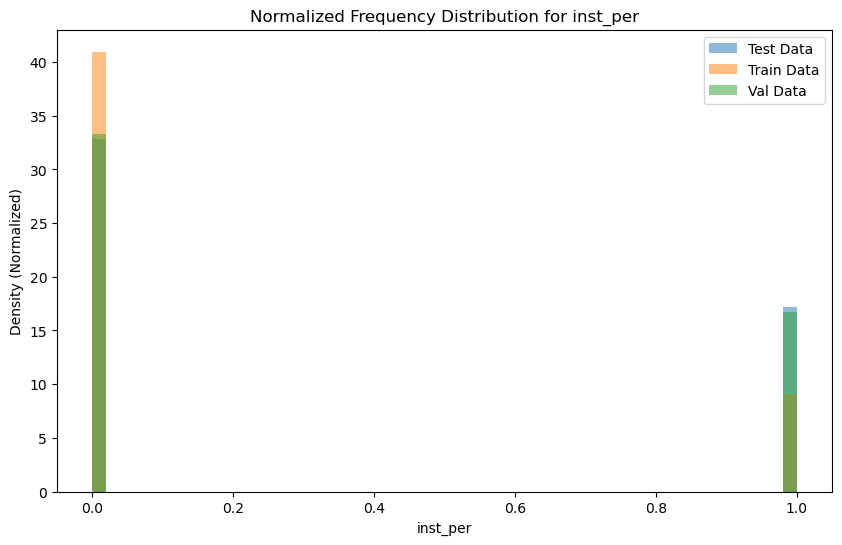

In [21]:
# Function to plot normalized distributions for each column
def plot_column_distributions(dfs, column):
    plt.figure(figsize=(10, 6))

    # Plot normalized histograms for each DataFrame
    for label, df in dfs.items():
        if column in df.columns:
            plt.hist(df[column].dropna(), bins=50, alpha=0.5, density=True, label=label)  # Normalize data
        else:
            print(f"Column '{column}' not found in {label}")

    # Set titles and labels
    plt.title(f'Normalized Frequency Distribution for {column}')
    plt.xlabel(column)
    plt.ylabel('Density (Normalized)')
    plt.legend(loc='upper right')
    
    # Save the plot
    graph_output_path = os.path.join(output_directory, f"{column}_comparison_normalized.png")
    plt.savefig(graph_output_path)
    print(f"Saved normalized frequency graph for {column} to {graph_output_path}")
    plt.show()  # Show the plot to verify if you're in Jupyter or similar environment
    plt.close()

# Load the three parquet files into DataFrames
dfs = {}
for label, path in file_paths.items():
    try:
        dfs[label] = pd.read_parquet(path)
        print(f"Loaded {label} from {path}")
    except Exception as e:
        print(f"Failed to load {label} from {path}: {e}")

# Plot normalized distributions for each column
for column in columns_to_plot:
    plot_column_distributions(dfs, column)